In [2]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# 加载数据
faces = fetch_lfw_people(min_faces_per_person=60)
faces

{'data': array([[138.        , 135.66667   , 127.666664  , ...,   1.6666666 ,
           1.6666666 ,   0.33333334],
        [ 71.333336  ,  56.        ,  67.666664  , ..., 247.66667   ,
         243.        , 238.33333   ],
        [ 84.333336  ,  97.333336  ,  72.333336  , ..., 114.        ,
         194.33333   , 241.        ],
        ...,
        [ 29.333334  ,  29.        ,  29.333334  , ..., 145.        ,
         147.        , 141.66667   ],
        [ 49.333332  ,  55.666668  ,  76.666664  , ..., 186.33333   ,
         176.33333   , 161.        ],
        [ 31.        ,  26.333334  ,  28.        , ...,  34.        ,
          42.        ,  69.666664  ]], dtype=float32),
 'images': array([[[138.        , 135.66667   , 127.666664  , ...,  69.        ,
           68.333336  ,  67.333336  ],
         [146.        , 139.33333   , 125.        , ...,  68.333336  ,
           67.666664  ,  67.333336  ],
         [150.        , 138.33333   , 124.333336  , ...,  68.333336  ,
           67

In [4]:
faces.data.shape

(1348, 2914)

In [5]:
faces.images.shape

(1348, 62, 47)

In [6]:
X = faces.data

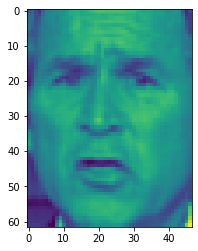

In [7]:
# 显示单单张图片
plt.imshow(faces.images[2,:, :])
plt.show()

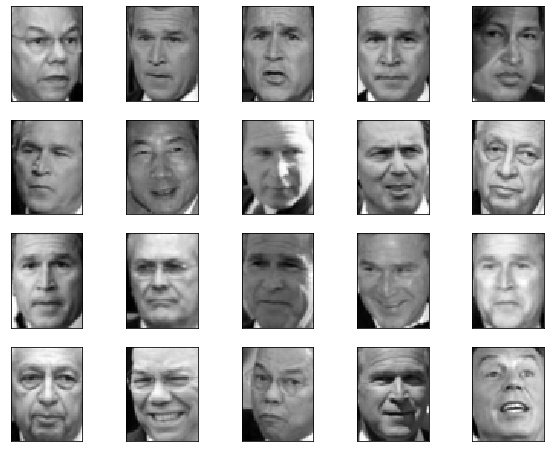

In [8]:
#　画个图吧
fig, ax = plt.subplots(4
                       , 5
                       , figsize= (10,8)
                       , subplot_kw = {"xticks":[], "yticks":[]}
                      )

for i ,ax in enumerate(ax.flat):
    ax.imshow(faces.images[i,:, :]
              ,cmap="gray" 
             )
plt.show()

In [9]:
# 给数据降低维度
pca = PCA(n_components=150).fit(X)

In [10]:
V = pca.components_
V

array([[-0.00579715, -0.00595362, -0.00615765, ..., -0.01000117,
        -0.00901097, -0.00813923],
       [ 0.01708353,  0.01623674,  0.01622026, ..., -0.03474263,
        -0.03416985, -0.03298327],
       [-0.01833671, -0.01670177, -0.01557062, ..., -0.03540293,
        -0.03147697, -0.0292978 ],
       ...,
       [ 0.03461258,  0.01770645, -0.00233393, ..., -0.03618461,
        -0.00931611,  0.00998821],
       [ 0.00366301,  0.01419832,  0.02652358, ...,  0.00815133,
         0.0117772 ,  0.0104664 ],
       [-0.0478397 , -0.02709527,  0.01181739, ..., -0.02480755,
         0.03599653,  0.06756213]], dtype=float32)

In [11]:
X.shape

(1348, 2914)

In [12]:
# V = ()
V.shape

(150, 2914)

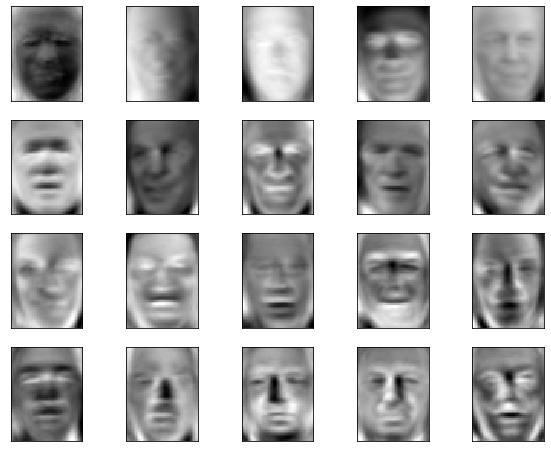

In [13]:
# 绘制前150个维度的特征向量
fig, axes = plt.subplots(4,5
                         ,figsize= (10,8)
                         ,subplot_kw = {"xticks":[],"yticks":[]}
                        )

for i, ax in enumerate(axes.flat):
    ax.imshow(V[i,:].reshape(62,47),cmap="gray")

plt.show()

In [14]:
pca.transform(X).shape

(1348, 150)

In [15]:
pca.n_components

150

### 探索一：$X_{dir} = X*V_{k,n}.T$的结果是否和sklearn封装的结果相同? 

#### 解析数据

In [16]:
# 绘制特征减少后的图
pca = PCA(1).fit(X)

# 右奇异矩阵(可以取得前k行作为降维后的维度), 默认右奇异矩阵的维数为n*n
# 通过SVD奇异值分解实现得到右奇异矩阵
V = pca.components_
V

array([[-0.00579705, -0.00595365, -0.00615767, ..., -0.01000114,
        -0.00901094, -0.00813919]], dtype=float32)

In [17]:
# 使用transform进行结果的输出
X_dir2 = pca.transform(X)

#### 对比 (两种操作得到的结果不同)

In [18]:
# 选取一个特征向量
X_dir1 = np.dot(X, V[0,:].T)
pd.DataFrame(X_dir1)

,0
0,-5880.934082
1,-6327.395996
2,-6988.068359
3,-7100.448730
4,-5455.630371
...,...
1343,-5925.013672
1344,-5478.117188
1345,-7574.950684
1346,-8552.124023


In [19]:
pd.DataFrame(X_dir2)

,0
0,1143.027954
1,696.565125
2,35.894432
3,-76.486664
4,1568.329956
...,...
1343,1098.947876
1344,1545.844360
1345,-550.988281
1346,-1528.163818


## 探索二：inversw_transform是否能将降维后的数据还原回来？

In [20]:
# 降维数据
pca = PCA(n_components=150)
X_dir = pca.fit_transform(X)
X_dir.shape

(1348, 150)

In [21]:
# 装换为原有数据
X_init = pca.inverse_transform(X_dir)
# 得到原始特征数据大小
X_init.shape

(1348, 2914)

#### 比较

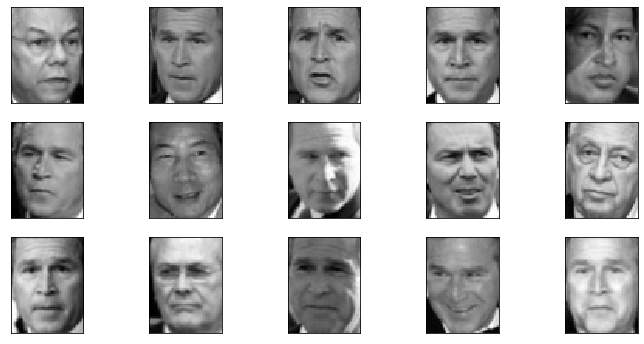

In [22]:
# 1. 原始数据图片的绘制
fig, ax = plt.subplots(3
                       , 5
                       , subplot_kw={"xticks":[], "yticks":[]}
                       , figsize = (12, 6)
                      )

for i, ax in enumerate(ax.flat):
    ax.imshow(X[i, :].reshape(62, 47), cmap="gray")

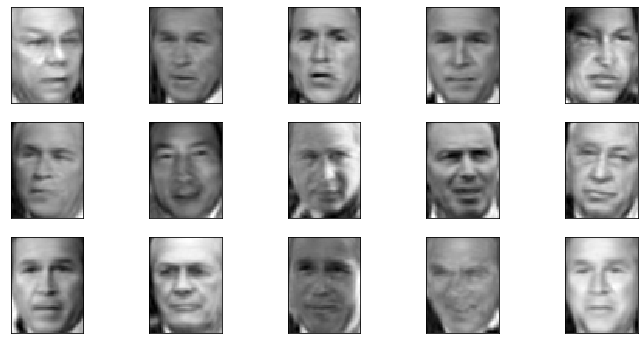

In [23]:
# 2. 重构后，恢复到原来的数据维度
fig, ax = plt.subplots(3
                       , 5
                       , subplot_kw={"xticks":[], "yticks":[]}
                       , figsize = (12, 6)
                      )

for i, ax in enumerate(ax.flat):
    ax.imshow(X_init[i, :].reshape(62, 47), cmap="gray")

**结论：**经过重构后的数据不能恢复到原来的数据，也即在降低维度的过程中所丢失的信息，即使在inverse后，也不能恢复到原来数据，丢失的数据不会再一次通过逆转恢复过了。所以，降维是不可逆的。（想法：是不能进行数据降噪）